# Assigment

## EDA

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [239]:
# read data
X = pd.read_csv('data/TCGAdata.txt', delim_whitespace=True, index_col=0, header=0)
Y = pd.read_csv('data/TCGAlabels.txt', delim_whitespace=True, index_col=0, header=0)

# merge to have the dataset in one dataframe
data = pd.concat([X, Y], axis=1)

/tmp/ipykernel_30326/2748754953.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv('data/TCGAdata.txt', delim_whitespace=True, index_col=0, header=0)


/tmp/ipykernel_30326/2748754953.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Y = pd.read_csv('data/TCGAlabels.txt', delim_whitespace=True, index_col=0, header=0)


In [240]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1991,V1992,V1993,V1994,V1995,V1996,V1997,V1998,V1999,V2000
1,-1.168003,1.261756,-1.534537,-0.156028,-0.700344,3.985627,2.432774,0.767859,1.225563,-0.198581,...,-0.015099,-0.217915,0.123574,-3.209894,-1.26123,-1.676247,-0.8625,-1.103947,-1.109631,0.43515
2,-3.272103,-0.269244,-1.534537,-0.679228,-0.947544,0.794827,0.067374,0.033459,-0.010137,-0.198581,...,0.285601,-0.155615,1.044074,-3.209894,-2.37073,1.973753,-1.9055,-1.103947,-1.109631,0.89295
3,-0.861503,-0.189544,-1.534537,0.010572,-0.268144,1.808827,1.273274,-0.501841,0.753163,-0.198581,...,-1.816599,-0.217015,0.023974,-3.209894,-0.27183,0.245753,-1.2135,-1.103947,-1.109631,-0.45655
4,-0.595803,-0.580044,-1.534537,-0.107828,-0.475644,0.738027,-1.945726,0.476859,-0.010137,-0.198581,...,-0.532399,-0.402215,-0.410726,-3.209894,0.36967,1.586153,-0.5700,-1.103947,1.215569,0.45415
5,1.336097,0.360556,-1.534537,-0.097728,0.359656,-0.940173,0.378774,-0.271741,-0.010137,-0.198581,...,-0.894799,0.043385,0.273874,-0.747594,-0.46893,-0.481547,0.6180,-1.103947,-0.392031,-0.88775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,-2.407703,-0.630444,-1.534537,-0.746028,-0.615444,2.733027,-2.976926,0.433959,-0.010137,-0.198581,...,-1.537899,0.185685,-1.025226,2.214606,-0.20143,4.214753,-2.8351,2.170853,-1.109631,0.21915
2884,0.626397,0.546456,-1.534537,0.291672,1.228856,1.607627,-0.696826,-0.359341,-0.010137,-0.198581,...,-3.281399,-0.248515,-0.691026,0.352406,0.52507,3.099053,-2.4853,-1.103947,1.709069,-1.31475
2885,-0.247003,1.178056,-1.534537,-0.232828,1.647956,3.450627,-0.517526,0.094659,-0.010137,-0.198581,...,-2.792999,-0.121515,-0.475626,1.095506,-1.49993,3.473553,2.9253,-1.103947,1.492969,-0.15755
2886,-0.765003,-0.291644,-0.409837,-0.533628,2.256756,1.657427,-3.786426,-2.083541,-0.010137,-0.198581,...,0.963001,-0.013315,0.250774,0.400806,-0.51443,3.139053,-2.9320,-1.103947,-1.109631,0.11055


In [241]:
Y

,x
1,GBM
2,GBM
3,GBM
4,GBM
5,GBM
...,...
2883,U
2884,U
2885,U
2886,U


Checking how the classes are balanced: 

<Axes: xlabel='x', ylabel='count'>

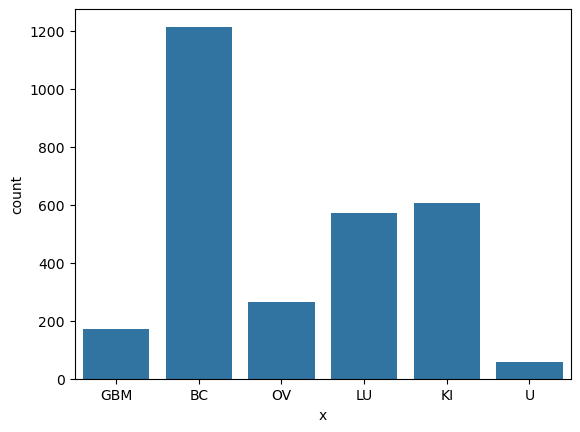

In [242]:
# hist of the class labels
sns.countplot(data=Y, x='x')

In [243]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(weights='uniform')

In [244]:
from sklearn.metrics import balanced_accuracy_score


pipeline_0 = Pipeline(steps=[('scaler', StandardScaler()), ('knn', knn)])

best_score = 0
best_k = 0

for k in [1, 3, 10, 50, 100, 300]:
    knn.set_params(n_neighbors=k)
    pipeline_0.fit(X_train, np.ravel(Y_train))
    
    Y_pred = pipeline_0.predict(X_train)
    score = balanced_accuracy_score(Y_train, Y_pred)
    
    if  score > best_score:
        best_score = score
        best_k = k
    
    pipeline_0.set_params(knn__n_neighbors=k)
    pipeline_0.fit(X_train, np.ravel(Y_train))
    Y_test_pred = pipeline_0.predict(X_test)
    print(k, score, balanced_accuracy_score(Y_test, Y_test_pred))

1 1.0 0.9756049936942778
3 0.97618963018787 0.9554922117393905
10 0.9502611459134708 0.9416879006862757
50 0.9002785426272565 0.8616544838107535
100 0.8366835201253391 0.8304076339036167
300 0.7662874608444173 0.7603322931719442


## Part 1 - Dimension reduction and predictive modeling

### Task 1: Perform cross-validation to select the number of principal components that optimizing predictive performance.

In [245]:
from sklearn.model_selection import StratifiedKFold


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2000)  
principal_components = pca.fit_transform(X_scaled)

explained_variance_ratios = pca.explained_variance_ratio_

cumulative_variance_ratios = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance_ratios)

n_components_80 = len(cumulative_variance_ratios[cumulative_variance_ratios <= 0.8]) + 1
print(f"Number of components needed to explain 80% variance: {n_components_80}")

n_components_50 = len(cumulative_variance_ratios[cumulative_variance_ratios <= 0.5]) + 1
print(f"Number of components needed to explain 50% variance: {n_components_50}")

[0.10393918 0.18858025 0.24557156 ... 1.         1.         1.        ]
Number of components needed to explain 80% variance: 226
Number of components needed to explain 50% variance: 15


<Axes: >

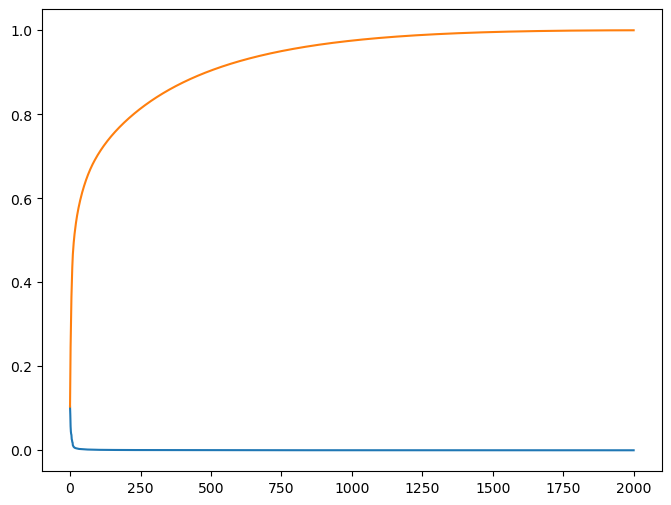

In [246]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=pca.explained_variance_ratio_)
sns.lineplot(data=cumulative_variance_ratios)

In [247]:
Y['x'].unique()

array(['GBM', 'BC', 'OV', 'LU', 'KI', 'U'], dtype=object)

In [248]:
# assingn a numbered label for Y
label_map = {'GBM': 0, 'BC': 1, 'OV': 2, 'LU': 3, 'KI': 4, 'U': 5}
Y['x'] = Y['x'].map(label_map)

In [249]:
Y

,x
1,0
2,0
3,0
4,0
5,0
...,...
2883,5
2884,5
2885,5
2886,5


In [250]:
parameters = {
    'pca__n_components': [500, 100, 50, 40, 35, 30, 25, 10],
    'knn__n_neighbors': [1, 10, 50, 100, 300]
}

pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', knn)
])


SyntaxError: invalid decimal literal (1430380695.py, line 1)

In [ ]:
grid_search = GridSearchCV(pipeline_1, parameters, cv=stratified_k_fold, n_jobs=-1, scoring="balanced_accuracy")

grid_search.fit(X_train, np.ravel(Y_train))
print(grid_search.best_params_)

{'knn__n_neighbors': 1, 'pca__n_components': 35}


In [ ]:
print(X_train.shape)

(2309, 2000)


In [ ]:
pipeline_1.set_params(**grid_search.best_params_)
pipeline_1.fit(X_train, np.ravel(Y_train))
Y_1 = pipeline_1.predict(X_test)

pipeline_1.set_params(**{'knn__n_neighbors': 2, 'pca__n_components': 35})
pipeline_1.fit(X_train, np.ravel(Y_train))
Y_2 = pipeline_1.predict(X_test)

pipeline_1.set_params(**{'knn__n_neighbors': 300, 'pca__n_components': 35})
pipeline_1.fit(X_train, np.ravel(Y_train))
Y_3 = pipeline_1.predict(X_test)

# comparing the results of the three models
from sklearn.metrics import balanced_accuracy_score

print(f"Model 1: {balanced_accuracy_score(Y_test, Y_1)}")
print(f"Model 2: {balanced_accuracy_score(Y_test, Y_2)}")
print(f"Model 3: {balanced_accuracy_score(Y_test, Y_3)}")

Model 1: 0.9971662695834236
Model 2: 0.9832773806945347
Model 3: 0.825422098592398


In [ ]:
# plot the best model
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=35)),
                ('knn',
                 KNeighborsClassifier(n_neighbors=1, weights='distance'))])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_test_pred = grid_search.predict(X_test)

print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.99      0.99       243
           2       1.00      1.00      1.00        53
           3       0.99      0.99      0.99       114
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00        12

    accuracy                           0.99       578
   macro avg       0.99      1.00      1.00       578
weighted avg       0.99      0.99      0.99       578



### Question 2

In [ ]:
# Create the RFECV model
from sklearn.feature_selection import RFECV
from sklearn.datasets import load_digits
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif

classifier = knn

parameters = {
    'kbest__k': [250, 225, 200, 175, 150, 100, 75, 50, 40, 35, 30],
    'knn__n_neighbors': [1, 2, 3, 5, 7, 10, 200,]
}

pipeline_2 = Pipeline([
    ('th', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('kbest', SelectKBest(score_func=f_classif)),
    ('knn', knn)
])

grid_search = GridSearchCV(pipeline_2, parameters, cv=stratified_k_fold, n_jobs=-1, scoring="balanced_accuracy")

grid_search.fit(X_train, np.ravel(Y_train))
print(grid_search.best_params_)

{'kbest__k': 200, 'knn__n_neighbors': 3}


In [ ]:
from collections import defaultdict  # Import defaultdict

# Get the cross-validation results
cv_results = grid_search.cv_results_

# Extract the mean test scores and parameters for each combination
mean_test_scores = cv_results['mean_test_score']
params = cv_results['params']

# Create a dictionary to store the best parameters and corresponding accuracy for each value of k neighbors
best_params_by_k = defaultdict(lambda: {'params': None, 'accuracy': -1})

# Iterate through the parameter combinations
for params, mean_score in zip(params, mean_test_scores):
    k = params['knn__n_neighbors']
    if mean_score > best_params_by_k[k]['accuracy']:
        best_params_by_k[k]['params'] = params
        best_params_by_k[k]['accuracy'] = mean_score

# Print the best parameters and corresponding accuracy for each value of k neighbors
for k, info in best_params_by_k.items():
    print(f"Best parameters for k={k}: {info['params']}")
    print(f"Accuracy: {info['accuracy']}")
    print()


Best parameters for k=1: {'kbest__k': 200, 'knn__n_neighbors': 1}
Accuracy: 0.9878256387736963

Best parameters for k=2: {'kbest__k': 100, 'knn__n_neighbors': 2}
Accuracy: 0.97561938885571

Best parameters for k=3: {'kbest__k': 200, 'knn__n_neighbors': 3}
Accuracy: 0.9912738133558914

Best parameters for k=5: {'kbest__k': 100, 'knn__n_neighbors': 5}
Accuracy: 0.9881040305649147

Best parameters for k=7: {'kbest__k': 100, 'knn__n_neighbors': 7}
Accuracy: 0.9870504449752466

Best parameters for k=10: {'kbest__k': 225, 'knn__n_neighbors': 10}
Accuracy: 0.9797618953222343

Best parameters for k=50: {'kbest__k': 250, 'knn__n_neighbors': 50}
Accuracy: 0.9502544615902376

